In [ ]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader  
from skimage import io

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Experiment 3

In [ ]:
!unzip "/content/drive/MyDrive/Soft Com Lab/Dataset_2.zip"

Archive:  /content/drive/MyDrive/Soft Com Lab/Dataset_2.zip
   creating: Dataset_2/
  inflating: Dataset_2/t10k-images-idx3-ubyte  
  inflating: Dataset_2/t10k-labels-idx1-ubyte  
  inflating: Dataset_2/train-images-idx3-ubyte  
  inflating: Dataset_2/train-labels-idx1-ubyte  
  inflating: Dataset_2/verification_test.csv  
  inflating: Dataset_2/verification_train.csv  


In [ ]:
train_csv2  = pd.read_csv('/content/Dataset_2/verification_train.csv')
test_csv2 = pd.read_csv('/content/Dataset_2/verification_test.csv')

In [ ]:
import numpy as np
class second_Dataset(Dataset):
    """User defined class to build a datset using Pytorch class Dataset."""
    
    def __init__(self, data, transform = None):
        """Method to initilaize variables.""" 
        self.data_MNIST = list(data.values)
        self.transform = transform
        
        label = []
        image = []
        
        for i in self.data_MNIST:
             # first column is of labels.
            label.append(i[0])
            image.append(i[1:])
        self.labels = np.asarray(label)
        self.images = np.asarray(image).reshape(-1, 28, 28, 1).astype('float32')

    def __getitem__(self, index):
        label = self.labels[index]
        image = self.images[index]
        
        if self.transform is not None:
            image = self.transform(image)

        return image, label

    def __len__(self):
        return len(self.images)

In [ ]:
train_set = second_Dataset(train_csv2, transform=transforms.Compose([transforms.ToTensor()]))
test_set = second_Dataset(test_csv2, transform=transforms.Compose([transforms.ToTensor()]))

train_loader = DataLoader(train_set, batch_size=100)
test_loader = DataLoader(train_set, batch_size=100)

For experiment 1

In [ ]:
print(len(train_set))
print(len(test_set))

60000
10000


In [ ]:
# Hyperparameters

batch_size = 20
num_iters = 20000
input_dim = 28*28 # num_features = 784
num_hidden = 200 # num of hidden nodes
output_dim = 10

learning_rate = 0.01  # More power so we can learn faster! previously it was 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")




'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False)





class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_6 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 1st hidden layer
        out = self.relu_3(out)
        
        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_4(out)

        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 1st hidden layer
        out = self.relu_5(out)
        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_6(out)
     
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
iteration_loss= []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.5603255033493042. Accuracy: 74.07
Iteration: 1000. Loss: 0.2123766392469406. Accuracy: 79.92
Iteration: 1500. Loss: 0.562910258769989. Accuracy: 80.62
Iteration: 2000. Loss: 0.7831628918647766. Accuracy: 84.04
Iteration: 2500. Loss: 0.2339363992214203. Accuracy: 83.55
Iteration: 3000. Loss: 0.35135355591773987. Accuracy: 81.44
Iteration: 3500. Loss: 0.2787415385246277. Accuracy: 84.14
Iteration: 4000. Loss: 0.46914806962013245. Accuracy: 85.88
Iteration: 4500. Loss: 0.3078378736972809. Accuracy: 85.37
Iteration: 5000. Loss: 0.49568837881088257. Accuracy: 85.63
Iteration: 5500. Loss: 0.7488682270050049. Accuracy: 82.54
Iteration: 6000. Loss: 0.14310647547245026. Accuracy: 86.5
Iteration: 6500. Loss: 0.31057268381118774. Accuracy: 86.34
Iteration: 7000. Loss: 0.39789703488349915. Accuracy: 85.87
Iteration: 7500. Loss: 0.29410016536712646. Accuracy: 85.79
Iteration: 8000. Loss: 0.10226656496524811. Accuracy: 86.72
Iteration: 8500. Loss: 0.3390966057777405. Accuracy

[0.5603255033493042, 0.2123766392469406, 0.562910258769989, 0.7831628918647766, 0.2339363992214203, 0.35135355591773987, 0.2787415385246277, 0.46914806962013245, 0.3078378736972809, 0.49568837881088257, 0.7488682270050049, 0.14310647547245026, 0.31057268381118774, 0.39789703488349915, 0.29410016536712646, 0.10226656496524811, 0.3390966057777405, 0.4140933156013489, 0.36458083987236023, 0.17625942826271057, 0.3477604389190674, 0.2251160591840744, 0.5050660967826843, 0.4743730425834656, 0.1990741342306137, 0.13482874631881714, 0.35656076669692993, 0.14147183299064636, 0.1733379364013672, 0.5805309414863586, 0.22187590599060059, 0.13436970114707947, 0.15430885553359985, 0.5106139779090881, 0.42067256569862366, 0.5023112297058105]


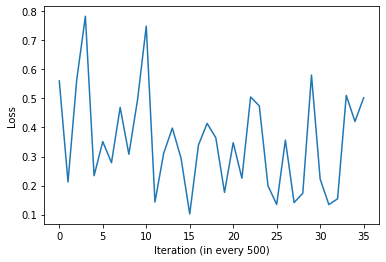

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

For experiment 2

In [ ]:
# Hyperparameters

#Batch Parameters
batch_size = 250
num_iters = 20000
input_dim = 28*28
num_hidden = 400
output_dim = 10

learning_rate = 0.01

num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



'''
MAKING DATASET ITERABLE
'''

train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()

       #First Hidden Layer
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.ReLU()

        #2nd Hidden Layer
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.ReLU()

         #3rd Hidden Layer
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.Softmax(dim=0)

         #4th Hidden Layer
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.Softmax(dim=0)

         #5th Hidden Layer
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        self.relu_5= nn.Tanh()
        
        #6th Hidden Layer
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        self.relu_6 = nn.Tanh()

        #7th Hidden Layer
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        self.relu_7 = nn.Tanh()

 
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        out = self.relu_6(out)

        out  = self.linear_7(out)
        out = self.relu_7(out)

        
        
        probas  = self.linear_out(out)
        return probas


# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

83
Iteration: 500. Loss: 2.302675724029541. Accuracy: 10.0
Iteration: 1000. Loss: 2.3027734756469727. Accuracy: 10.0
Iteration: 1500. Loss: 2.302478075027466. Accuracy: 10.0
Iteration: 2000. Loss: 2.3029041290283203. Accuracy: 10.0
Iteration: 2500. Loss: 2.3028247356414795. Accuracy: 10.04
Iteration: 3000. Loss: 2.3025729656219482. Accuracy: 9.99
Iteration: 3500. Loss: 2.3025925159454346. Accuracy: 10.0
Iteration: 4000. Loss: 2.3029816150665283. Accuracy: 10.0
Iteration: 4500. Loss: 2.302497148513794. Accuracy: 10.0
Iteration: 5000. Loss: 2.3024532794952393. Accuracy: 10.0
Iteration: 5500. Loss: 2.302732229232788. Accuracy: 10.0
Iteration: 6000. Loss: 2.3025529384613037. Accuracy: 9.96
Iteration: 6500. Loss: 2.302485942840576. Accuracy: 10.0
Iteration: 7000. Loss: 2.3026211261749268. Accuracy: 10.0
Iteration: 7500. Loss: 2.3026928901672363. Accuracy: 10.0
Iteration: 8000. Loss: 2.302455186843872. Accuracy: 10.0
Iteration: 8500. Loss: 2.3028128147125244. Accuracy: 10.0
Iteration: 9000. 

[2.302675724029541, 2.3027734756469727, 2.302478075027466, 2.3029041290283203, 2.3028247356414795, 2.3025729656219482, 2.3025925159454346, 2.3029816150665283, 2.302497148513794, 2.3024532794952393, 2.302732229232788, 2.3025529384613037, 2.302485942840576, 2.3026211261749268, 2.3026928901672363, 2.302455186843872, 2.3028128147125244, 2.302617073059082, 2.302482843399048, 2.3028299808502197, 2.3025543689727783, 2.302591323852539, 2.3026859760284424, 2.3027188777923584, 2.3026251792907715, 2.302562952041626, 2.3027706146240234, 2.302661895751953, 2.302694082260132, 2.30252742767334, 2.3027143478393555, 2.302684783935547, 2.3028438091278076, 2.302619457244873, 2.302520751953125, 2.302731990814209, 2.3025128841400146, 2.3026793003082275, 2.302725315093994]


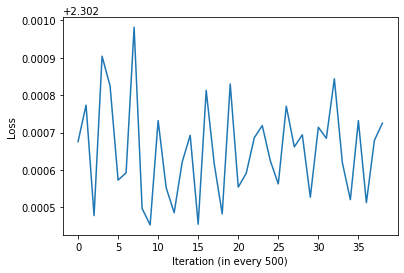

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()